In [1]:
import pandas as pd
df= pd.read_csv("Cali.csv")
df.head()

,incident_name,incident_is_final,incident_date_last_update,incident_date_created,incident_administrative_unit,incident_administrative_unit_url,incident_county,incident_location,incident_acres_burned,incident_containment,...,incident_latitude,incident_type,incident_id,incident_url,incident_date_extinguished,incident_dateonly_extinguished,incident_dateonly_created,is_active,calfire_incident,notification_desired
0,Bridge Fire,Y,2018-01-09T13:46:00Z,2017-10-31T11:22:00Z,Shasta-Trinity National Forest,NaN,Shasta,"I-5 and Turntable Bay, 7 miles NE of Shasta Lake",37.0,100.0,...,40.774000,NaN,2ca11d45-8139-4c16-8af0-880d99b21e82,https://www.fire.ca.gov/incidents/2017/10/31/b...,2018-01-09T13:46:00Z,2018-01-09,2017-10-31,N,False,False
1,Pala Fire,Y,2020-09-16T14:07:35Z,2009-05-24T14:56:00Z,CAL FIRE San Diego Unit,NaN,San Diego,"Hwy 76 and Pala Temecula, northwest of Pala",122.0,100.0,...,1.000000,Wildfire,8f61f461-552d-4538-b186-35ab030da416,https://www.fire.ca.gov/incidents/2009/5/24/pa...,2009-05-25T00:00:00Z,2009-05-25,2009-05-24,N,True,False
2,River Fire,Y,2022-10-24T11:39:23Z,2013-02-24T08:16:00Z,CAL FIRE San Bernardino Unit,NaN,Inyo,"south of Narrow Gauge Rd & north of Hwy 136, e...",407.0,100.0,...,36.602575,NaN,094719ba-a47b-4abb-9ec5-a506b2b9fd23,https://www.fire.ca.gov/incidents/2013/2/24/ri...,2013-02-28T20:00:00Z,2013-02-28,2013-02-24,N,True,False
3,Fawnskin Fire,Y,2013-04-22T09:00:00Z,2013-04-20T17:30:00Z,San Bernardino National Forest,NaN,San Bernardino,"west of Delamar Mountain, north of the communi...",30.0,100.0,...,34.288877,NaN,58f89ff8-bd3e-4355-b1c0-8fa05c747d3f,https://www.fire.ca.gov/incidents/2013/4/20/fa...,2013-04-22T09:00:00Z,2013-04-22,2013-04-20,N,False,False
4,Gold Fire,Y,2013-05-01T07:00:00Z,2013-04-30T12:59:00Z,CAL FIRE Madera-Mariposa-Merced Unit,NaN,Madera,Between Road 210 and Road 200 near Fine Gold C...,274.0,100.0,...,37.116295,NaN,357ffc13-bef9-48eb-810f-c5de851972eb,https://www.fire.ca.gov/incidents/2013/4/30/go...,2013-05-01T07:00:00Z,2013-05-01,2013-04-30,N,True,False


In [2]:
columns_to_drop = [
    "incident_date_last_update",
    "incident_date_created",
    "incident_administrative_unit",
    "incident_administrative_unit_url",
    "incident_location",
    "incident_containment",
    "incident_url",
    "incident_date_extinguished",
    "incident_dateonly_extinguished",
    "incident_control",
    "incident_is_final",
    "incident_cooperating_agencies",
    "incident_id",
    "is_active",
    "calfire_incident",
    "notification_desired"
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

df.dropna(subset=["incident_type"], inplace=True)
df.head()

,incident_name,incident_county,incident_acres_burned,incident_longitude,incident_latitude,incident_type,incident_dateonly_created
1,Pala Fire,San Diego,122.0,1.00000,1.00000,Wildfire,2009-05-24
188,Sand Fire,"Amador, El Dorado",4240.0,-120.78190,38.56910,Wildfire,2014-07-25
258,Wragg Fire,Napa,8051.0,-122.11450,38.49940,Wildfire,2015-07-22
307,Butte Fire,Butte,70868.0,-120.70418,38.32974,Wildfire,2015-09-09
840,Atlas Fire (Southern LNU Complex),"Napa, Solano",51624.0,-122.24367,38.39206,Wildfire,2017-10-09


In [3]:
# Convert to datetime
df['incident_dateonly_created'] = pd.to_datetime(df['incident_dateonly_created'], errors='coerce')

# Now extract year and month
df['year'] = df['incident_dateonly_created'].dt.year
df['month'] = df['incident_dateonly_created'].dt.month
df.drop(columns =[ "incident_dateonly_created"], inplace= True)


In [4]:
df.head()

,incident_name,incident_county,incident_acres_burned,incident_longitude,incident_latitude,incident_type,year,month
1,Pala Fire,San Diego,122.0,1.00000,1.00000,Wildfire,2009,5
188,Sand Fire,"Amador, El Dorado",4240.0,-120.78190,38.56910,Wildfire,2014,7
258,Wragg Fire,Napa,8051.0,-122.11450,38.49940,Wildfire,2015,7
307,Butte Fire,Butte,70868.0,-120.70418,38.32974,Wildfire,2015,9
840,Atlas Fire (Southern LNU Complex),"Napa, Solano",51624.0,-122.24367,38.39206,Wildfire,2017,10


In [5]:
# Drop rows with given years (in-place)
years_to_drop = [2018, 2017, 2015, 2009, 2014]

df.drop(df[df["year"].isin(years_to_drop)].index, inplace=True)


In [6]:
# Drop rows where 'incident_acres_burned' is null (in-place)
df.dropna(subset=['incident_acres_burned'], inplace=True)


In [7]:

# Step 1: Determine a threshold for high-severity wildfires
# We use the 55th percentile of 'incident_acres_burned' to define this threshold.
# This means that the largest 45% of fires (by acres burned) will be considered "high-severity",
# while the smaller 55% will be considered "low-severity" or normal fires.

threshold = df['incident_acres_burned'].quantile(0.50)
df['high_severity'] = df['incident_acres_burned'] > threshold
df.head()


,incident_name,incident_county,incident_acres_burned,incident_longitude,incident_latitude,incident_type,year,month,high_severity
1246,IronGate Fire,Siskiyou,10.0,-122.401570,41.946220,Wildfire,2019,6,False
1262,Merced Fire,Merced,210.0,-120.242411,37.312877,Wildfire,2019,6,True
1264,Coyote Fire,Santa Clara,74.0,-121.694968,37.189040,Wildfire,2019,7,True
1265,Hollow Fire,San Joaquin,283.0,-121.538382,37.632060,Wildfire,2019,7,True
1266,Bikeway Fire,Alameda,25.0,-121.369700,37.469000,Wildfire,2019,7,False


In [8]:
print("Threshold (55th percentile acres burned):", threshold)

Threshold (55th percentile acres burned): 57.5


In [9]:
df['high_severity'].value_counts()


high_severity
False    1005
True     1005
Name: count, dtype: int64

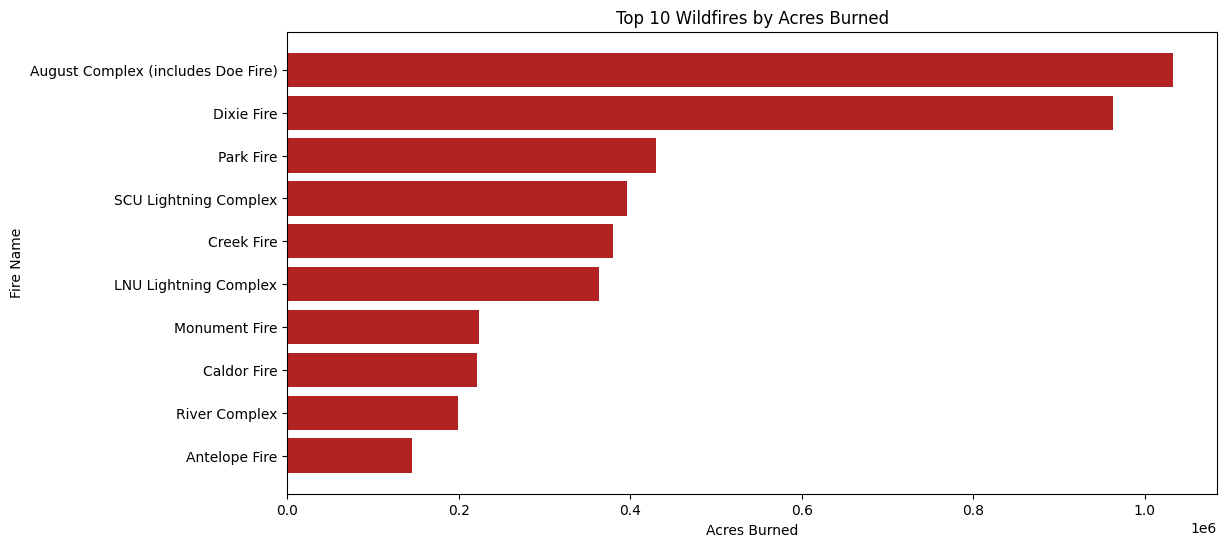

In [10]:
import matplotlib.pyplot as plt

# Step 1: Select top 10 fires by acres burned
top10_fires = df.sort_values(by='incident_acres_burned', ascending=False).head(10)

# Step 2: Create bar chart
plt.figure(figsize=(12,6))
plt.barh(top10_fires['incident_name'], top10_fires['incident_acres_burned'], color='firebrick')
plt.xlabel('Acres Burned')
plt.ylabel('Fire Name')
plt.title('Top 10 Wildfires by Acres Burned')
plt.gca().invert_yaxis()  # Largest fire on top
plt.show()


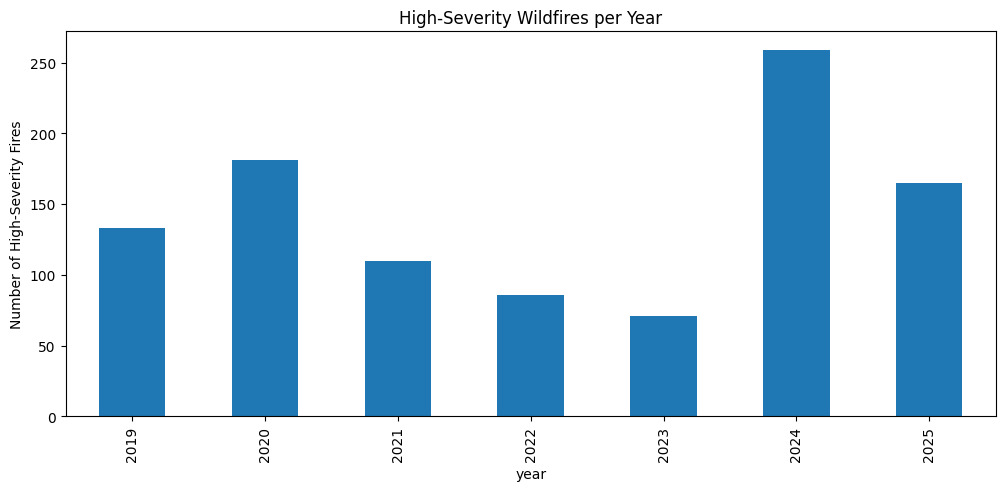

In [11]:
import matplotlib.pyplot as plt

df.groupby('year')['high_severity'].sum().plot(kind='bar', figsize=(12,5))
plt.ylabel('Number of High-Severity Fires')
plt.title('High-Severity Wildfires per Year')
plt.show()


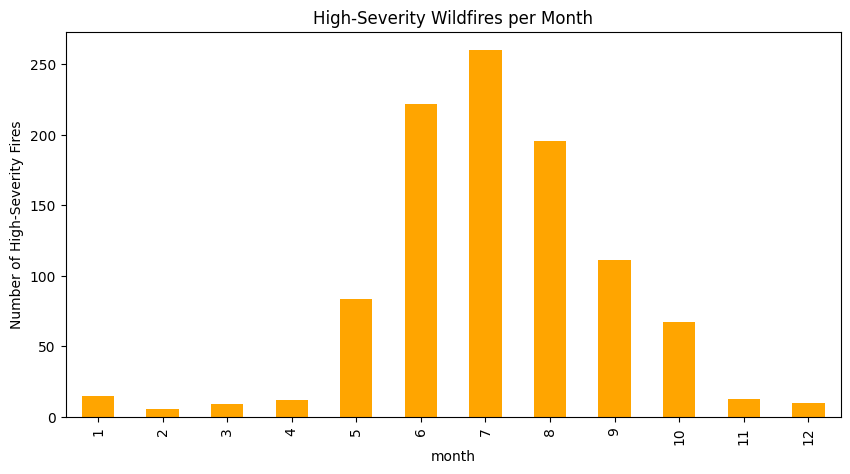

In [12]:
df.groupby('month')['high_severity'].sum().plot(kind='bar', figsize=(10,5), color='orange')
plt.ylabel('Number of High-Severity Fires')
plt.title('High-Severity Wildfires per Month')
plt.show()


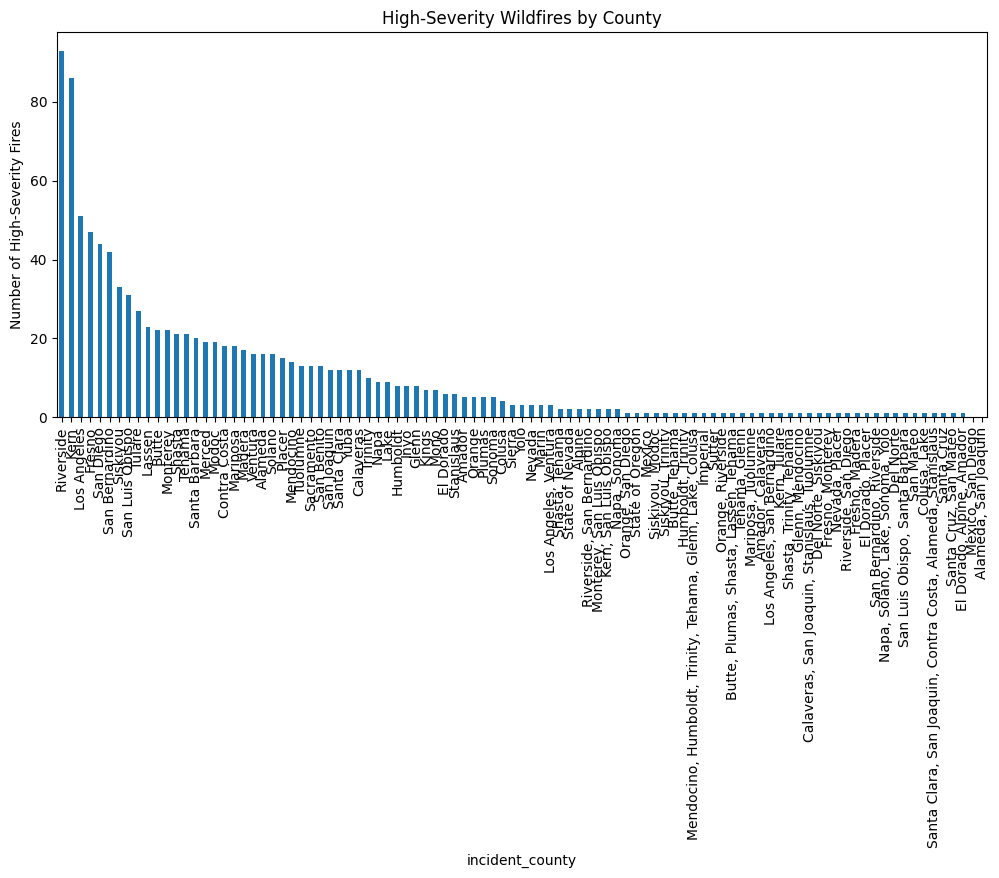

In [13]:
df.groupby('incident_county')['high_severity'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,5))
plt.ylabel('Number of High-Severity Fires')
plt.title('High-Severity Wildfires by County')
plt.show()


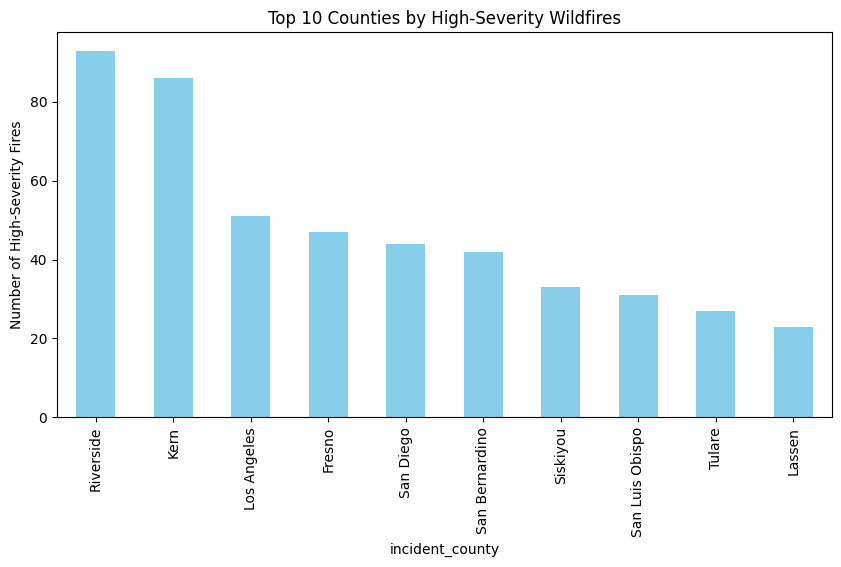

In [14]:
top_counties = df.groupby('incident_county')['high_severity'].sum().sort_values(ascending=False).head(10)
top_counties.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.ylabel('Number of High-Severity Fires')
plt.title('Top 10 Counties by High-Severity Wildfires')
plt.show()


NOW LET US TRAIN OUR MODEL BASED ON DATA SO WE CAN PREDICT 

In [15]:
# Convert True/False to 1/0
df['high_severity'] = df['high_severity'].astype(int)
df

,incident_name,incident_county,incident_acres_burned,incident_longitude,incident_latitude,incident_type,year,month,high_severity
1246,IronGate Fire,Siskiyou,10.0,-122.401570,41.946220,Wildfire,2019,6,0
1262,Merced Fire,Merced,210.0,-120.242411,37.312877,Wildfire,2019,6,1
1264,Coyote Fire,Santa Clara,74.0,-121.694968,37.189040,Wildfire,2019,7,1
1265,Hollow Fire,San Joaquin,283.0,-121.538382,37.632060,Wildfire,2019,7,1
1266,Bikeway Fire,Alameda,25.0,-121.369700,37.469000,Wildfire,2019,7,0
...,...,...,...,...,...,...,...,...,...
3335,Lost Fire,Ventura,13.0,-118.751784,34.301578,Wildfire,2025,9,0
3336,Martell Fire,Stanislaus,37.0,-120.732557,37.906127,Wildfire,2025,9,0
3337,Cobb Fire,Humboldt,12.0,-123.527677,40.463864,Wildfire,2025,9,0
3338,Vleck Fire,Sacramento,30.0,-121.074736,38.482401,Wildfire,2025,9,0


/var/folders/93/mn47xvtn5xsdlk715wjwh0x40000gn/T/ipykernel_2507/1382387335.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='incident_acres_burned', data=acres_per_year, palette='Oranges_r')


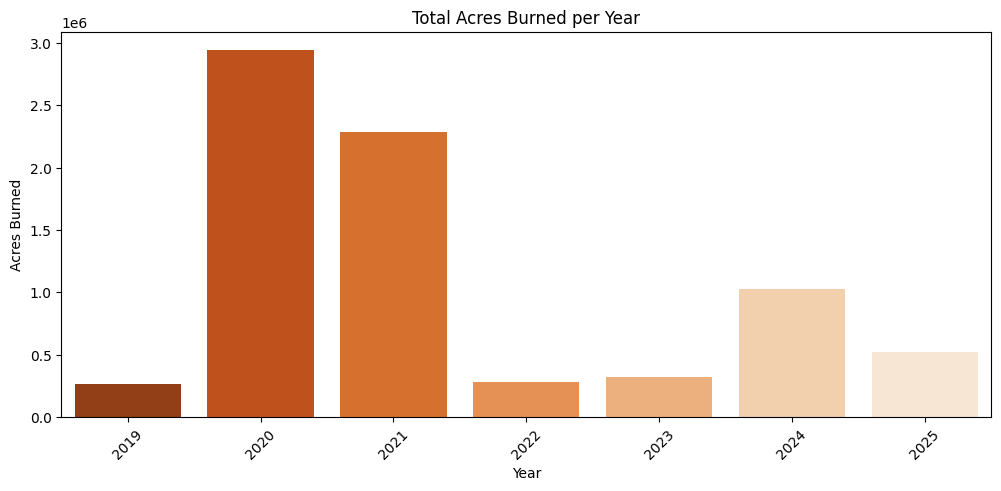

/var/folders/93/mn47xvtn5xsdlk715wjwh0x40000gn/T/ipykernel_2507/1382387335.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='incident_county', y='incident_acres_burned', data=acres_per_county, palette='Reds_r')


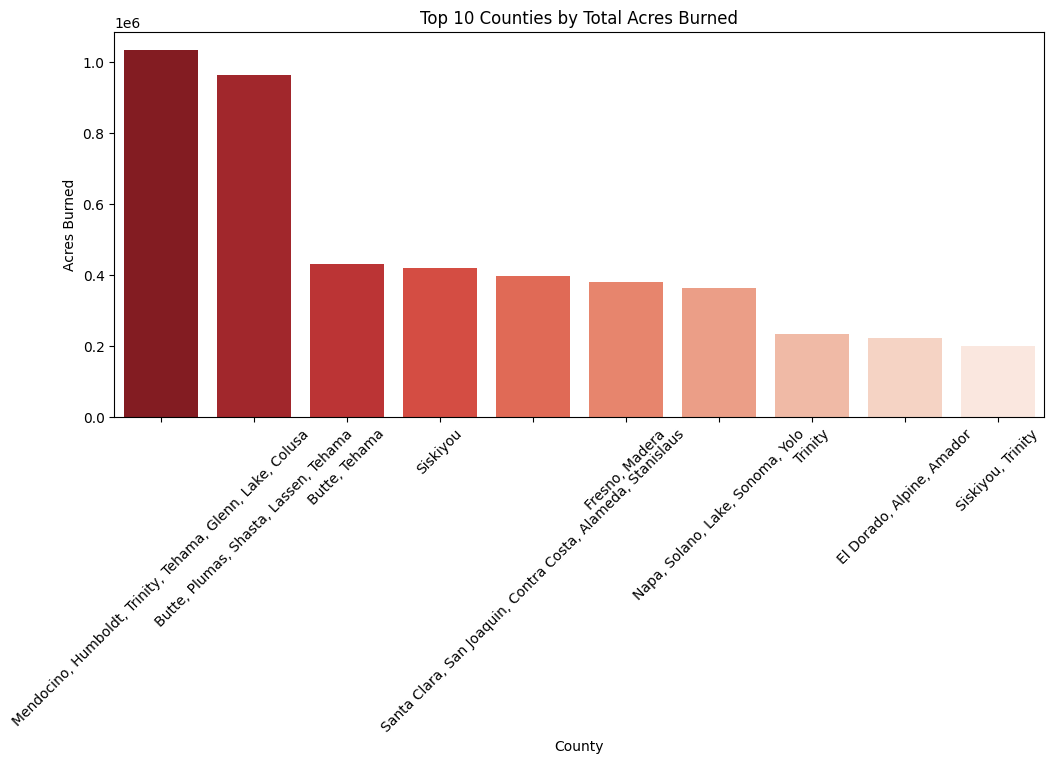

In [16]:


import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Acres burned per year
acres_per_year = df.groupby('year')['incident_acres_burned'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(x='year', y='incident_acres_burned', data=acres_per_year, palette='Oranges_r')
plt.xticks(rotation=45)
plt.title('Total Acres Burned per Year')
plt.xlabel('Year')
plt.ylabel('Acres Burned')
plt.show()

# 2️⃣ Acres burned per county (top 10 counties with most acres burned)
acres_per_county = df.groupby('incident_county')['incident_acres_burned'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,5))
sns.barplot(x='incident_county', y='incident_acres_burned', data=acres_per_county, palette='Reds_r')
plt.xticks(rotation=45)
plt.title('Top 10 Counties by Total Acres Burned')
plt.xlabel('County')
plt.ylabel('Acres Burned')
plt.show()


In [17]:
# Sum acres burned per year
acres_per_year = df.groupby('year')['incident_acres_burned'].sum()

# Year with the maximum burned acres
max_year = acres_per_year.idxmax()
max_acres = acres_per_year.max()

print(f"The year with the highest total acres burned is {max_year} with {int(max_acres)} acres.")


The year with the highest total acres burned is 2020 with 2941860 acres.


In [19]:
# Sum acres burned per year
acres_per_year = df.groupby('year')['incident_acres_burned'].sum()

# Year with the maximum burned acres
max_year = acres_per_year.idxmin()
max_acres = acres_per_year.min()

print(f"The year with the lowest total acres burned is {max_year} with {int(max_acres)} acres.")

The year with the lowest total acres burned is 2019 with 267549 acres.


In [20]:
df.to_csv("Cleaned_Cali_Fire.csv", index=False)

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, accuracy_score, roc_curve)
import joblib
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# 1. LOAD AND PREPARE DATA
# ============================================================================
print("="*80)
print("CALIFORNIA WILDFIRE SEVERITY PREDICTION")
print("="*80)

# Load data
df = pd.read_csv('Cleaned_Cali_Fire.csv')

# Select features (WITHOUT incident_type)
features = ['incident_acres_burned', 'incident_longitude', 'incident_latitude', 
            'year', 'month']
X = df[features]
y = df['high_severity']

print(f"\nDataset Info:")
print(f"  Total samples: {len(df)}")
print(f"  Features: {features}")
print(f"  Target: high_severity (0=Low/Medium, 1=High)")
print(f"\nClass Distribution:")
print(f"  Low/Medium Severity (0): {(y==0).sum()} samples ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"  High Severity (1): {(y==1).sum()} samples ({(y==1).sum()/len(y)*100:.1f}%)")

# ============================================================================
# 2. SPLIT DATA
# ============================================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData Split:")
print(f"  Training: {len(X_train)} samples (80%)")
print(f"  Testing: {len(X_test)} samples (20%)")

# ============================================================================
# 3. SCALE FEATURES (needed for Logistic Regression)
# ============================================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✓ Features scaled using StandardScaler")

# ============================================================================
# 4. TRAIN MODELS
# ============================================================================
print("\n" + "="*80)
print("TRAINING MACHINE LEARNING MODELS")
print("="*80)

# -------------------------------------------------------------------------
# MODEL 1: RANDOM FOREST (PRIMARY RECOMMENDATION)
# -------------------------------------------------------------------------
print("\n1. Training Random Forest Classifier...")
rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of decision trees
    max_depth=15,           # Maximum depth of trees
    min_samples_split=5,    # Minimum samples to split a node
    min_samples_leaf=2,     # Minimum samples in leaf node
    random_state=42,
    n_jobs=-1               # Use all CPU cores for speed
)
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)

print(f"\n✓ Random Forest Training Complete")
print(f"  Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"  ROC-AUC Score: {rf_roc_auc:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, rf_pred, 
                          target_names=['Low/Medium Severity', 'High Severity']))
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, rf_pred)
print(cm_rf)
print(f"  True Negatives: {cm_rf[0,0]} | False Positives: {cm_rf[0,1]}")
print(f"  False Negatives: {cm_rf[1,0]} | True Positives: {cm_rf[1,1]}")

# -------------------------------------------------------------------------
# MODEL 2: GRADIENT BOOSTING
# -------------------------------------------------------------------------
print("\n" + "="*80)
print("\n2. Training Gradient Boosting Classifier...")
gb_model = GradientBoostingClassifier(
    n_estimators=100,       # Number of boosting stages
    learning_rate=0.1,      # Learning rate
    max_depth=5,            # Maximum depth of trees
    random_state=42
)
gb_model.fit(X_train, y_train)

# Make predictions
gb_pred = gb_model.predict(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Evaluate
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_roc_auc = roc_auc_score(y_test, gb_pred_proba)

print(f"\n✓ Gradient Boosting Training Complete")
print(f"  Accuracy: {gb_accuracy:.4f} ({gb_accuracy*100:.2f}%)")
print(f"  ROC-AUC Score: {gb_roc_auc:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, gb_pred, 
                          target_names=['Low/Medium Severity', 'High Severity']))

# -------------------------------------------------------------------------
# MODEL 3: LOGISTIC REGRESSION (BASELINE)
# -------------------------------------------------------------------------
print("\n" + "="*80)
print("\n3. Training Logistic Regression...")
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000
)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_roc_auc = roc_auc_score(y_test, lr_pred_proba)

print(f"\n✓ Logistic Regression Training Complete")
print(f"  Accuracy: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"  ROC-AUC Score: {lr_roc_auc:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, lr_pred, 
                          target_names=['Low/Medium Severity', 'High Severity']))

# ============================================================================
# 5. MODEL COMPARISON
# ============================================================================
print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)

comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, gb_accuracy, lr_accuracy],
    'ROC-AUC': [rf_roc_auc, gb_roc_auc, lr_roc_auc]
})
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)


CALIFORNIA WILDFIRE SEVERITY PREDICTION

Dataset Info:
  Total samples: 2010
  Features: ['incident_acres_burned', 'incident_longitude', 'incident_latitude', 'year', 'month']
  Target: high_severity (0=Low/Medium, 1=High)

Class Distribution:
  Low/Medium Severity (0): 1005 samples (50.0%)
  High Severity (1): 1005 samples (50.0%)

Data Split:
  Training: 1608 samples (80%)
  Testing: 402 samples (20%)

✓ Features scaled using StandardScaler

TRAINING MACHINE LEARNING MODELS

1. Training Random Forest Classifier...

✓ Random Forest Training Complete
  Accuracy: 1.0000 (100.00%)
  ROC-AUC Score: 1.0000

Detailed Classification Report:
                     precision    recall  f1-score   support

Low/Medium Severity       1.00      1.00      1.00       201
      High Severity       1.00      1.00      1.00       201

           accuracy                           1.00       402
          macro avg       1.00      1.00      1.00       402
       weighted avg       1.00      1.00      1.00 

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, accuracy_score, roc_curve)
import joblib
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# 1. LOAD AND PREPARE DATA
# ============================================================================
print("="*80)
print("CALIFORNIA WILDFIRE SEVERITY PREDICTION")
print("NO DATA LEAKAGE - acres_burned excluded")
print("="*80)

# Load data
df = pd.read_csv('Cleaned_Cali_Fire.csv')

# Features WITHOUT acres_burned to avoid data leakage
features = ['incident_longitude', 'incident_latitude', 'year', 'month']
X = df[features]
y = df['high_severity']

print(f"\nDataset Info:")
print(f"  Total samples: {len(df)}")
print(f"  Features: {features}")
print(f"  Target: high_severity (0=Low/Medium, 1=High)")
print(f"\nClass Distribution:")
print(f"  Low/Medium Severity (0): {(y==0).sum()} ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"  High Severity (1): {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)")

# ============================================================================
# 2. SPLIT DATA
# ============================================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData Split:")
print(f"  Training: {len(X_train)} samples (80%)")
print(f"  Testing: {len(X_test)} samples (20%)")

# ============================================================================
# 3. SCALE FEATURES
# ============================================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✓ Features scaled using StandardScaler")

# ============================================================================
# 4. TRAIN MULTIPLE MODELS
# ============================================================================
print("\n" + "="*80)
print("TRAINING MULTIPLE MODELS")
print("="*80)

# Model 1: Random Forest
print("\n1. Training Random Forest Classifier...")
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)
print(f"   Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"   ROC-AUC: {rf_roc_auc:.4f}")

# Model 2: Gradient Boosting
print("\n2. Training Gradient Boosting Classifier...")
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=10,
    random_state=42
)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_roc_auc = roc_auc_score(y_test, gb_pred_proba)
print(f"   Accuracy: {gb_accuracy:.4f} ({gb_accuracy*100:.2f}%)")
print(f"   ROC-AUC: {gb_roc_auc:.4f}")

# Model 3: Logistic Regression
print("\n3. Training Logistic Regression...")
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    C=1.0
)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_roc_auc = roc_auc_score(y_test, lr_pred_proba)
print(f"   Accuracy: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"   ROC-AUC: {lr_roc_auc:.4f}")

# Model 4: Support Vector Machine
print("\n4. Training Support Vector Machine...")
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    random_state=42,
    probability=True
)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_roc_auc = roc_auc_score(y_test, svm_pred_proba)
print(f"   Accuracy: {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")
print(f"   ROC-AUC: {svm_roc_auc:.4f}")

# ============================================================================
# 5. MODEL COMPARISON
# ============================================================================
print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)

comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'SVM'],
    'Accuracy': [rf_accuracy, gb_accuracy, lr_accuracy, svm_accuracy],
    'ROC-AUC': [rf_roc_auc, gb_roc_auc, lr_roc_auc, svm_roc_auc]
})
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)
print("\n" + comparison_df.to_string(index=False))

best_model_name = comparison_df.iloc[0]['Model']
best_accuracy = comparison_df.iloc[0]['Accuracy']
best_auc = comparison_df.iloc[0]['ROC-AUC']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"   ROC-AUC: {best_auc:.4f}")

# ============================================================================
# 6. SELECT BEST MODEL
# ============================================================================
if best_model_name == 'Random Forest':
    best_model = rf_model
    best_pred = rf_pred
    best_pred_proba = rf_pred_proba
    uses_scaled = False
elif best_model_name == 'Gradient Boosting':
    best_model = gb_model
    best_pred = gb_pred
    best_pred_proba = gb_pred_proba
    uses_scaled = False
elif best_model_name == 'Logistic Regression':
    best_model = lr_model
    best_pred = lr_pred
    best_pred_proba = lr_pred_proba
    uses_scaled = True
else:
    best_model = svm_model
    best_pred = svm_pred
    best_pred_proba = svm_pred_proba
    uses_scaled = True

# ============================================================================
# 7. DETAILED RESULTS FOR BEST MODEL
# ============================================================================
print("\n" + "="*80)
print(f"DETAILED RESULTS - {best_model_name.upper()}")
print("="*80)

print("\nClassification Report:")
print(classification_report(y_test, best_pred, 
                          target_names=['Low/Medium Severity', 'High Severity']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, best_pred)
print(cm)
print(f"\nBreakdown:")
print(f"  True Negatives (Correctly predicted Low/Medium): {cm[0,0]}")
print(f"  False Positives (Predicted High, actually Low): {cm[0,1]}")
print(f"  False Negatives (Predicted Low, actually High): {cm[1,0]}")
print(f"  True Positives (Correctly predicted High): {cm[1,1]}")

# ============================================================================
# 8. FEATURE IMPORTANCE (if applicable)
# ============================================================================
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    print("\n" + "="*80)
    print("FEATURE IMPORTANCE")
    print("="*80)
    
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': best_model.feature_importances_,
        'Percentage': [f"{imp*100:.2f}%" for imp in best_model.feature_importances_]
    }).sort_values('Importance', ascending=False)
    
    print("\n" + feature_importance_df.to_string(index=False))

# ============================================================================
# 9. CROSS-VALIDATION
# ============================================================================
print("\n" + "="*80)
print("CROSS-VALIDATION (5-Fold)")
print("="*80)

if uses_scaled:
    cv_data = scaler.fit_transform(X)
else:
    cv_data = X

cv_scores = cross_val_score(best_model, cv_data, y, cv=5, scoring='accuracy')
cv_auc_scores = cross_val_score(best_model, cv_data, y, cv=5, scoring='roc_auc')

print(f"\nAccuracy Scores:")
print(f"  Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
print(f"  Individual Folds: {[f'{score:.4f}' for score in cv_scores]}")

print(f"\nROC-AUC Scores:")
print(f"  Mean: {cv_auc_scores.mean():.4f} (+/- {cv_auc_scores.std()*2:.4f})")
print(f"  Individual Folds: {[f'{score:.4f}' for score in cv_auc_scores]}")

# ============================================================================
# 10. HYPERPARAMETER TUNING (for tree-based models)
# ============================================================================
if best_model_name == 'Random Forest':
    print("\n" + "="*80)
    print("HYPERPARAMETER TUNING")
    print("="*80)
    
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 15, 20, None],
        'min_samples_split': [5, 10, 15],
        'min_samples_leaf': [2, 5, 10]
    }
    
    print("\nSearching for best hyperparameters...")
    print("This may take a few minutes...")
    
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42, n_jobs=-1),
        param_grid,
        cv=3,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    
    print(f"\nBest Parameters: {grid_search.best_params_}")
    print(f"Best CV ROC-AUC Score: {grid_search.best_score_:.4f}")
    
    # Evaluate tuned model
    tuned_model = grid_search.best_estimator_
    tuned_pred = tuned_model.predict(X_test)
    tuned_pred_proba = tuned_model.predict_proba(X_test)[:, 1]
    tuned_accuracy = accuracy_score(y_test, tuned_pred)
    tuned_auc = roc_auc_score(y_test, tuned_pred_proba)
    
    print(f"\nTuned Model Test Performance:")
    print(f"  Accuracy: {tuned_accuracy:.4f} ({tuned_accuracy*100:.2f}%)")
    print(f"  ROC-AUC: {tuned_auc:.4f}")
    
    improvement = tuned_accuracy - best_accuracy
    print(f"\nImprovement over default: {improvement:+.4f} ({improvement*100:+.2f}%)")
    
    if tuned_accuracy > best_accuracy:
        best_model = tuned_model
        best_accuracy = tuned_accuracy
        best_auc = tuned_auc
        print("\n✓ Using tuned model as final model")

# ============================================================================
# 11. SAVE MODELS AND METADATA
# ============================================================================
print("\n" + "="*80)
print("SAVING MODELS")
print("="*80)

# Save the best model
joblib.dump(best_model, 'wildfire_severity_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

# Create and save metadata
model_metadata = {
    'model_type': best_model_name,
    'features_used': str(features),
    'test_accuracy': best_accuracy,
    'test_roc_auc': best_auc,
    'cv_accuracy_mean': cv_scores.mean(),
    'cv_roc_auc_mean': cv_auc_scores.mean(),
    'training_samples': len(X_train),
    'test_samples': len(X_test),
    'total_samples': len(df),
    'data_leakage': 'NO - acres_burned excluded',
    'uses_scaler': uses_scaled
}

metadata_df = pd.Series(model_metadata)
metadata_df.to_csv('model_metadata.csv', header=['value'])

print("\n✓ Models saved successfully:")
print("  1. wildfire_severity_model.pkl - Trained model")
print("  2. feature_scaler.pkl - StandardScaler for preprocessing")
print("  3. model_metadata.csv - Model information and metrics")

# ============================================================================
# 12. EXAMPLE PREDICTIONS
# ============================================================================
print("\n" + "="*80)
print("EXAMPLE PREDICTIONS ON NEW DATA")
print("="*80)

# Create example fires
examples = pd.DataFrame({
    'incident_longitude': [-120.5, -118.2, -122.0, -121.0, -119.5],
    'incident_latitude': [38.5, 34.0, 40.0, 37.5, 36.0],
    'year': [2019, 2025, 2024, 2025, 2024],
    'month': [7, 11, 8, 6, 9]
})

# Prepare data (scale if needed)
if uses_scaled:
    examples_prepared = scaler.transform(examples)
    predictions = best_model.predict(examples_prepared)
    probabilities = best_model.predict_proba(examples_prepared)
else:
    predictions = best_model.predict(examples)
    probabilities = best_model.predict_proba(examples)

print("\nPredicting severity for 5 hypothetical fires:\n")
for i in range(len(examples)):
    print(f"Fire {i+1}:")
    print(f"  Location: ({examples.iloc[i]['incident_latitude']:.1f}°N, "
          f"{examples.iloc[i]['incident_longitude']:.1f}°W)")
    print(f"  Time: {['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][int(examples.iloc[i]['month'])-1]} "
          f"{int(examples.iloc[i]['year'])}")
    print(f"  Predicted Severity: {'🔥 HIGH SEVERITY' if predictions[i]==1 else '⚠️  LOW/MEDIUM SEVERITY'}")
    print(f"  Confidence:")
    print(f"    - High Severity: {probabilities[i][1]*100:.1f}%")
    print(f"    - Low/Medium Severity: {probabilities[i][0]*100:.1f}%")
    print()

# ============================================================================
# 13. HOW TO USE THE SAVED MODEL
# ============================================================================
print("="*80)
print("HOW TO LOAD AND USE THE MODEL LATER")
print("="*80)

print("""
# To use the saved model in the future:

import joblib
import pandas as pd

# Load the model and scaler
model = joblib.load('wildfire_severity_model.pkl')
scaler = joblib.load('feature_scaler.pkl')

# Load metadata to check if scaling is needed
metadata = pd.read_csv('model_metadata.csv', index_col=0)
uses_scaler = metadata.loc['uses_scaler', 'value'] == 'True'

# Prepare new fire data
new_fire = pd.DataFrame({
    'incident_longitude': [-121.5],
    'incident_latitude': [38.0],
    'year': [2025],
    'month': [8]
})

# Scale if needed
if uses_scaler:
    new_fire_prepared = scaler.transform(new_fire)
else:
    new_fire_prepared = new_fire

# Make prediction
prediction = model.predict(new_fire_prepared)
probability = model.predict_proba(new_fire_prepared)

# Display result
severity = 'HIGH SEVERITY' if prediction[0] == 1 else 'LOW/MEDIUM SEVERITY'
confidence = probability[0][prediction[0]] * 100

print(f"Predicted: {severity} (Confidence: {confidence:.1f}%)")
""")

print("\n" + "="*80)
print("✓ COMPLETE! MODEL READY FOR DEPLOYMENT")
print("="*80)
print(f"\nFinal Model: {best_model_name}")
print(f"Test Accuracy: {best_accuracy:.2%}")
print(f"Test ROC-AUC: {best_auc:.4f}")
print(f"CV Accuracy: {cv_scores.mean():.2%} (+/- {cv_scores.std()*2:.2%})")
print("\n✓ No data leakage - model is valid for real-world use!")


CALIFORNIA WILDFIRE SEVERITY PREDICTION
NO DATA LEAKAGE - acres_burned excluded

Dataset Info:
  Total samples: 2010
  Features: ['incident_longitude', 'incident_latitude', 'year', 'month']
  Target: high_severity (0=Low/Medium, 1=High)

Class Distribution:
  Low/Medium Severity (0): 1005 (50.0%)
  High Severity (1): 1005 (50.0%)

Data Split:
  Training: 1608 samples (80%)
  Testing: 402 samples (20%)

✓ Features scaled using StandardScaler

TRAINING MULTIPLE MODELS

1. Training Random Forest Classifier...
   Accuracy: 0.6045 (60.45%)
   ROC-AUC: 0.6697

2. Training Gradient Boosting Classifier...
   Accuracy: 0.5945 (59.45%)
   ROC-AUC: 0.6289

3. Training Logistic Regression...
   Accuracy: 0.6144 (61.44%)
   ROC-AUC: 0.6338

4. Training Support Vector Machine...
   Accuracy: 0.6095 (60.95%)
   ROC-AUC: 0.6301

MODEL COMPARISON

              Model  Accuracy  ROC-AUC
Logistic Regression  0.614428 0.633821
                SVM  0.609453 0.630133
      Random Forest  0.604478 0.669736
 